In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import cosmolopy.distance as distance

In [105]:
datos=pd.read_csv("jla_likelihood_v6/data/jla_lcparams.txt", sep=" ")#.sort_values(by = "zcmb")

In [106]:
def mu(w):
    return datos["mb"] - (w[2] - w[0]*datos["x1"] + w[1]*datos["color"])

w=[0.141,3.101,-19.05,0.5]
# w[0]=alpha   w[1]=beta    w[2]=Mb    w[3]=om_M

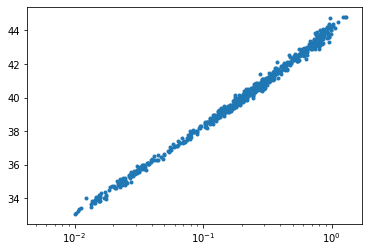

In [107]:
plt.scatter(datos["zcmb"], mu(w),marker = '.')
plt.xscale('log')

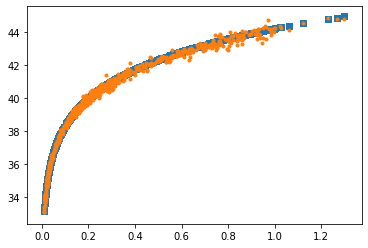

In [108]:
plt.scatter(datos['zcmb'], 5*np.log10(distance.luminosity_distance(datos['zcmb'], **cosmo)*10**6/10), marker = ',')
plt.scatter(datos['zcmb'], mu(w), marker = '.')

In [109]:
def muteo(omega):
    cosmo={'omega_M_0':omega, 'omega_lambda_0':1-omega,'omega_k_0':0.0,'h':0.7}
    return 5*np.log10(distance.luminosity_distance(datos['zcmb'],**cosmo)*1e6/10)

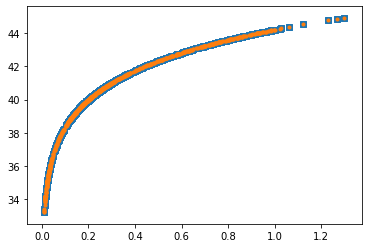

In [110]:
muteo(0.22)
plt.scatter(datos['zcmb'], 5*np.log10(distance.luminosity_distance(datos['zcmb'], **cosmo)*10**6/10), marker = ',')
plt.scatter(datos['zcmb'], muteo(0.22), marker = '.')

In [111]:
mat0=pd.read_csv("jla_likelihood_v6/data/jla_v0_covmatrix.dat",sep=" ").to_numpy().reshape(740, 740)
mat1=pd.read_csv("jla_likelihood_v6/data/jla_v0a_covmatrix.dat",sep=" ").to_numpy().reshape(740, 740)
mat2=pd.read_csv("jla_likelihood_v6/data/jla_v0b_covmatrix.dat",sep=" ").to_numpy().reshape(740, 740)
mat3=pd.read_csv("jla_likelihood_v6/data/jla_va_covmatrix.dat",sep=" ").to_numpy().reshape(740, 740)
mat4=pd.read_csv("jla_likelihood_v6/data/jla_vab_covmatrix.dat",sep=" ").to_numpy().reshape(740, 740)
mat5=pd.read_csv("jla_likelihood_v6/data/jla_vb_covmatrix.dat",sep=" ").to_numpy().reshape(740, 740)

covmat=mat0+mat1+mat2+mat3+mat4+mat5

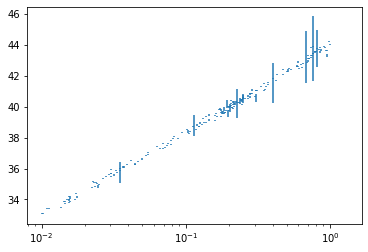

In [113]:
plt.errorbar(datos['zcmb'],mu(w),yerr=np.diag(covmat),linestyle = 'None')
plt.xscale('log')

In [118]:
def chisq(w):
    return abs(np.sum(np.matmul((mu(w)-muteo(w[3])).T,covmat)*(mu(w)-muteo(w[3]))))

In [119]:
w=[0.1,3,-19,0.5]
minim=minimize(chisq,w)
minim

      fun: 0.2980349234671399
 hess_inv: array([[ 0.01733295, -0.08895438, -0.00519475, -0.00634882],
       [-0.08895438,  4.36110063,  0.04983227, -0.09501622],
       [-0.00519475,  0.04983227,  0.00452354,  0.00719663],
       [-0.00634882, -0.09501622,  0.00719663,  0.02085262]])
      jac: array([-2.68220901e-07,  3.65078449e-07, -1.63912773e-07, -2.83122063e-07])
  message: 'Optimization terminated successfully.'
     nfev: 96
      nit: 13
     njev: 16
   status: 0
  success: True
        x: array([  0.09835677,   1.56521788, -19.11773719,   0.27249366])